In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib import style


class K_means:
    
    def __init__(self, k=3, tolerance=0.0001, max_iter=500):
        self.k = k
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.centers = {}
        
    def euclidean(self, feature_one, feature_two):
        distance = 0
        
        if (len(feature_one) != len(feature_two)):
            return -1
            
        for i in range(len(feature_one)):
            distance += (feature_one[i] - feature_two[i]) ** 2
        
        ed = np.sqrt(distance)
        return ed
        
    def fit(self, data):
        
        # Set the centroids to be the first numbers in the data
        for i in range(self.k):
            self.centers[i] = data[i]
            
        # Start iteration
        for i in range(self.max_iter):
            self.classes = {}
            
            # Create list for every centroid
            for i in range(self.k):
                self.classes[i] = []
                
            # Find the distance between a point and cluster, then choose the nearest centroid
            for features in data:
                distances = [self.euclidean(features, self.centers[center]) for center in self.centers]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)
                
            previous = dict(self.centers)
            
            # Average cluster datapoints for recalculations
            for classification in self.classes:
                self.centers[classification] = np.average(self.classes[classification], axis = 0)
            
            isOptimal = True
            
            for center in self.centers:
                original = previous[center]
                current = self.centers[center]
                if np.sum( (current - original) / original * 100.0) > self.tolerance:
                    isOptimal = False
                    
            if isOptimal:
                break
                
    def predict(self, data):
        if self.centers == None:
            print("Error; centers is null. fit the data before predicting.")
            return
        distances = [self.euclidean(data, self.centers[center]) for center in self.centers]
        classification = distances.index(min(distances))
        return classification

Final Centroids: [-1.4472039252760382, 0.8385748913305076]
Final Centroids: [-1.6749165089855418, 4.2056348232038205]
Final Centroids: [-7.096497706646571, -8.038057221961594]
Final Centroids: [-6.0781608285348465, -3.165959944093184]
Final Centroids: [-9.844380514289066, -3.6688962427916714]


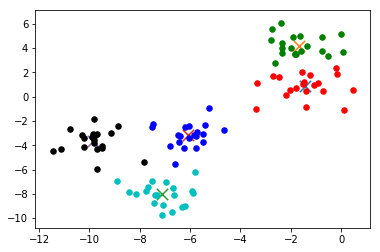

Final Centroids: [1.1548365570336059, -0.4752021327043044]
Final Centroids: [0.6814801945327411, -0.22908194849313496]
Final Centroids: [-0.6802582279177971, 0.6052102470562079]
Final Centroids: [1.655052023196391, 0.015163414068461601]
Final Centroids: [0.3106444877887361, 0.5617695805749843]


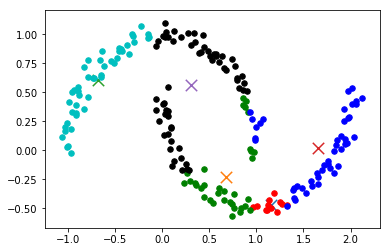

Final Centroids: [-0.13454115428841165, -0.7427575164942479]
Final Centroids: [-0.3902106524755212, 0.6058278030084986]
Final Centroids: [0.5498769791782655, -0.43162984019221023]
Final Centroids: [0.49725948735554115, 0.42530627738443644]
Final Centroids: [-0.6837540442240599, -0.18008224852139326]


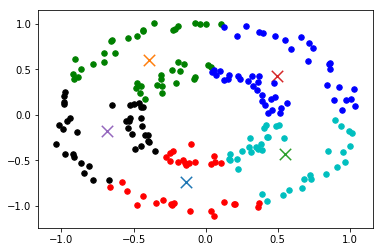

In [2]:
def plot_data(km):
    colors = 10*["r", "g", "c", "b", "k"]

    for center in km.centers:
        plt.scatter(km.centers[center][0], km.centers[center][1], s = 130, marker = "x")
        print('Final Centroids: [{}, {}]'.format(km.centers[center][0], km.centers[center][1]))

    for classification in km.classes:
        color = colors[classification]
        for features in km.classes[classification]:
            plt.scatter(features[0], features[1], color = color,s = 30)
    
    plt.show()


def main():
    x, y = make_blobs(n_samples=100, centers=5, n_features=2, random_state=1)
    a, b = datasets.make_circles(n_samples=200, factor=.5, noise=.05)
    c, d = datasets.make_moons(n_samples=200, noise=.05)
    kmSK = KMeans()
    km = K_means(k=5)
    
    kmSK.fit(a)
    colors = 10*["r", "g", "c", "b", "k"]
    
    #for data in kmSK.cluster_centers_:
        #plt.scatter(data[0], data[1], s = 130, marker = "x")
        #print('Final Centroids: [{}, {}]'.format(data[0], data[1]))

    #for classification in kmSK.labels_:
    #    color = colors[classification]
    #    for features in kmSK.labels_[classification]:
    #        plt.scatter(features[0], features[1], color = color,s = 30)
    km.fit(x)
    plot_data(km)
    
    km.fit(c)
    plot_data(km)
    
    km.fit(a)
    plot_data(km)




if __name__ == "__main__":
    main()